# Proyecto de CNN: Clasificación de Drones vs Pájaros

En este apartado, desarrollaremos una red neuronal convolucional (CNN) para clasificar imágenes en dos categorías: drones y pájaros. Comenzaremos trabajando con un dataset que contiene imágenes de ambas clases, organizadas en carpetas para entrenamiento, validación y prueba.

### Carga del Dataset

Para cargar el dataset, utilizamos la biblioteca `kagglehub` para descargarlo directamente desde Kaggle. Posteriormente, definimos las rutas de las carpetas que contienen las imágenes de entrenamiento, validación y prueba. Estas imágenes se organizan en subcarpetas según su clase (drones o pájaros) y se procesan para asignar etiquetas basadas en el nombre del archivo. Esto nos permite estructurar los datos de manera adecuada para su uso en el entrenamiento y evaluación del modelo.

Estos datasets están listos para ser utilizados en el entrenamiento y evaluación de la red neuronal.

In [15]:
import kagglehub
import os

# Descargar el dataset desde KaggleHub
print("Descargando el dataset...")
path = kagglehub.dataset_download("stealthknight/bird-vs-drone")
print("descargado:", path)

Descargando el dataset...
descargado: /home/feliciano/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1


In [16]:
# Mostrar la estructura
print("Estructura:")
for root, dirs, files in os.walk(path):
    print(f"\nCarpeta: {root}")
    for file in files[5:]:
        print(f"  - {file}")

Estructura:

Carpeta: /home/feliciano/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1

Carpeta: /home/feliciano/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset

Carpeta: /home/feliciano/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/train

Carpeta: /home/feliciano/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/train/images
  - BTR (5992).jpg
  - BTR (3848).jpg
  - BTR (6218).jpg
  - DTR (1482).jpg
  - BTR (3501).jpg
  - BTR (5731).jpg
  - BTR (6267).jpg
  - DTR (4761).jpg
  - BTR (4980).jpg
  - BTR (360).jpg
  - BTR (3156).jpg
  - BTR (1097).jpg
  - DTR (9870).jpg
  - DTR (5014).jpg
  - DTR (2734).jpg
  - DTR (377).jpg
  - DTR (4487).jpg
  - DTR (3629).jpg
  - DTR (706).jpg
  - BTR (4076).jpg
  - DTR (520).jpg
  - DTR (6437).jpg
  - BTR (6219).jpg
  - DTR (7004).jpg
  - BTR (3208).jpg
  - DTR (7248).jpg
  - DTR (5777).jpg
  - BTR (778).jpg
  - DTR (4807).jpg
  - DTR (5400).jpg
  - BTR (62).jpg

In [17]:
# Definir rutas a las imágenes de entrenamiento y validación
train_ds = '/home/feliciano/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/train/images'
valid_ds = '/home/feliciano/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/valid/images'
test_ds = '/home/feliciano/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset/test/images'

### Distribución de imagenes en el Dataset

La distribución de imágenes en el dataset es la siguiente:

- **Entrenamiento**: 10,934 imágenes de drones y 7,389 imágenes de pájaros.
- **Validación**: 1,039 imágenes de drones y 701 imágenes de pájaros.
- **Test**: 528 imágenes de drones y 361 imágenes de pájaros.

La función `asignar_etiqueta` se utiliza para asignar etiquetas a las imágenes del dataset basándose en el nombre del archivo. Este proceso es crucial para estructurar los datos de manera que puedan ser utilizados en el entrenamiento y evaluación del modelo. La función analiza el nombre del archivo y asigna una etiqueta (`'pajaro'` o `'dron'`) dependiendo de los prefijos específicos presentes en el nombre del archivo, como `BTR`, `DTR`, `BV`, `DV`, `BT` o `DT`. Si un archivo no contiene un prefijo válido, se descarta para evitar errores en el procesamiento.

In [18]:
from glob import glob
from collections import Counter

# Obtener listas de imágenes
train_images = glob(os.path.join(train_ds, "*.jpg"))
valid_images = glob(os.path.join(valid_ds, "*.jpg"))
test_images = glob(os.path.join(test_ds, "*.jpg"))

# Función para asignar etiquetas según el nombre del archivo
def asignar_etiqueta(imagen):
    if 'BTR' in imagen:  # Pájaro en entrenamiento
        return 'pajaro'
    elif 'DTR' in imagen:  # Dron en entrenamiento
        return 'dron'
    elif 'BV' in imagen:  # Pájaro en validación
        return 'pajaro'
    elif 'DV' in imagen:  # Dron en validación
        return 'dron'
    elif 'BT' in imagen:  # Pájaro en test
        return 'pajaro'
    elif 'DT' in imagen:  # Dron en test
        return 'dron'
    else:
        return None  # Eliminamos cualquier archivo sin etiqueta válida

# Asignar etiquetas
train_labels = [asignar_etiqueta(img) for img in train_images]
valid_labels = [asignar_etiqueta(img) for img in valid_images]
test_labels = [asignar_etiqueta(img) for img in test_images]

# Eliminar cualquier imagen que no haya sido etiquetada correctamente
train_images = [img for img, label in zip(train_images, train_labels) if label is not None]
train_labels = [label for label in train_labels if label is not None]
test_images = [img for img, label in zip(test_images, test_labels) if label is not None]
test_labels = [label for label in test_labels if label is not None]

valid_images = [img for img, label in zip(valid_images, valid_labels) if label is not None]
valid_labels = [label for label in valid_labels if label is not None]

# Contar la cantidad de imágenes por clase
contador_train = Counter(train_labels)
contador_valid = Counter(valid_labels)
contador_test = Counter(test_labels)

# Verificar la cantidad de imágenes por clase
print("Cantidad de imágenes por clase (Entrenamiento):", contador_train)
print("Cantidad de imágenes por clase (Validación):", contador_valid)
print("Cantidad de imágenes por clase (Test):", contador_test)

Cantidad de imágenes por clase (Entrenamiento): Counter({'dron': 10934, 'pajaro': 7389})
Cantidad de imágenes por clase (Validación): Counter({'dron': 1039, 'pajaro': 701})
Cantidad de imágenes por clase (Test): Counter({'dron': 528, 'pajaro': 361})


### Distribución de Clases en el Dataset

Hemos revisado la distribución de las clases en las distintas carpetas del dataset:

- **Train**: 21868 archivos de drones (DTR) y 14778 archivos de pájaros (BTR).
- **Valid**: 2078 archivos de drones (DV) y 1402 archivos de pájaros (BV).
- **Test**: 1056 archivos de drones (DT) y 722 archivos de pájaros (BT).

Esta distribución nos permite evaluar el desempeño de nuestra red neuronal en diferentes etapas: entrenamiento, validación y prueba.

In [19]:
from collections import Counter
import os

def count_btr_dtr(directory):
    btr_count = 0
    dtr_count = 0
    bv_count = 0
    dv_count = 0
    bt_count = 0
    dt_count = 0
    
    for root, _, files in os.walk(directory):
        for file in files:
            if "BTR" in file:
                btr_count += 1
            elif "DTR" in file:
                dtr_count += 1
            elif "BV" in file:
                bv_count += 1
            elif "DV" in file:
                dv_count += 1
            elif "BT" in file:
                bt_count += 1
            elif "DT" in file:
                dt_count += 1
    
    return Counter({"BTR": btr_count, "DTR": dtr_count, "BV": bv_count, "DV": dv_count, "BT": bt_count, "DT": dt_count})

dataset_dir = "/home/feliciano/.cache/kagglehub/datasets/stealthknight/bird-vs-drone/versions/1/Dataset"
btr_dtr_counts = count_btr_dtr(dataset_dir)
print(btr_dtr_counts)

Counter({'DTR': 21868, 'BTR': 14778, 'DV': 2078, 'BV': 1402, 'DT': 1056, 'BT': 722})


### Visualización de Imágenes del Dataset

Es importante verificar visualmente algunas imágenes del dataset para asegurarnos de que las imágenes se han cargado correctamente y que corresponden a las clases esperadas (drones y pájaros).

A continuación, realizaremos una visualización de algunas imágenes de los datasets de entrenamiento, validación y prueba.

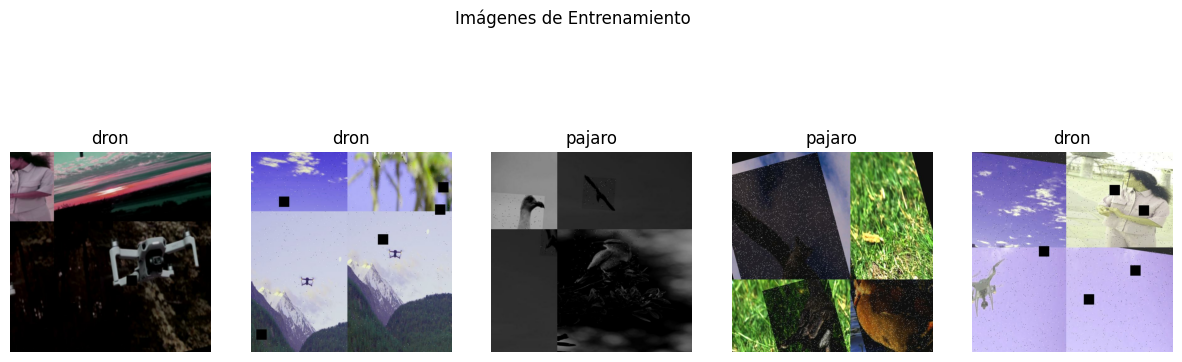

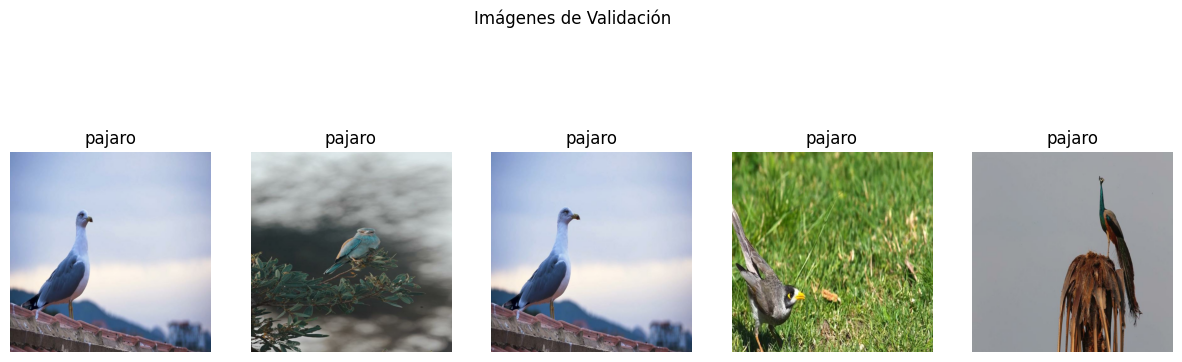

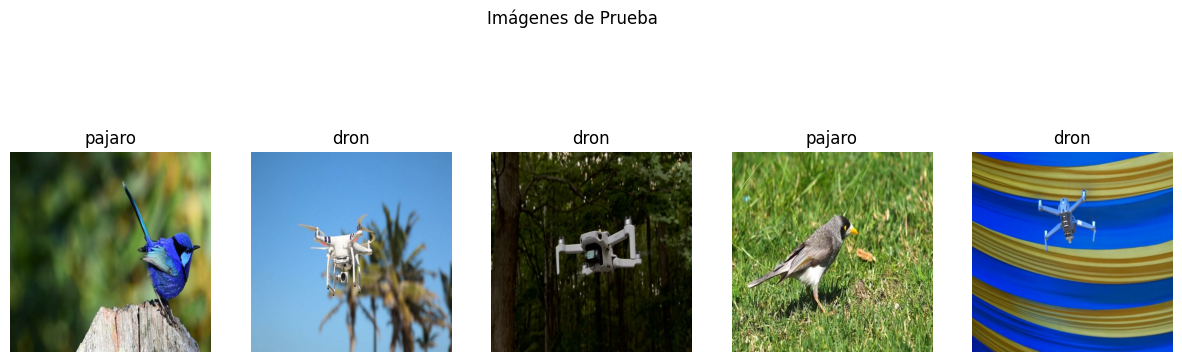

In [20]:
import random
import tensorflow as tf

import matplotlib.pyplot as plt

# Función para mostrar imágenes
def mostrar_imagenes(image_paths, labels, title, num_images=5):
    plt.figure(figsize=(15, 5))
    indices = random.sample(range(len(image_paths)), num_images)
    for i, idx in enumerate(indices):
        image = tf.io.read_file(image_paths[idx])
        image = tf.image.decode_jpeg(image, channels=3)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(labels[idx])
    plt.suptitle(title)
    plt.show()

# Mostrar imágenes de entrenamiento
mostrar_imagenes(train_images, train_labels, "Imágenes de Entrenamiento")

# Mostrar imágenes de validación
mostrar_imagenes(valid_images, valid_labels, "Imágenes de Validación")

# Mostrar imágenes de prueba
mostrar_imagenes(test_images, test_labels, "Imágenes de Prueba")

### Estadísticas de las Imágenes del Dataset
Redimensionamos todas las imágenes del dataset a un tamaño uniforme de 224x224 píxeles para garantizar la consistencia en el procesamiento y entrenamiento del modelo. Esto incluye las imágenes de entrenamiento, validación y prueba.

In [21]:
from PIL import Image

# Función para redimensionar imágenes
def redimensionar_imagenes(image_paths, output_size=(224, 224)):
    for path in image_paths:
        with Image.open(path) as img:
            img_resized = img.resize(output_size)
            img_resized.save(path)  # Sobrescribe la imagen original

# Redimensionar imágenes de entrenamiento, validación y prueba
redimensionar_imagenes(train_images)
redimensionar_imagenes(valid_images)
redimensionar_imagenes(test_images)

print("Todas las imágenes han sido redimensionadas a 224x224.")

Todas las imágenes han sido redimensionadas a 224x224.


In [22]:
from PIL import Image

# Función para obtener las dimensiones de las imágenes
def obtener_dimensiones(image_paths):
    dimensiones = []
    for path in image_paths:
        with Image.open(path) as img:
            dimensiones.append(img.size)  # (ancho, alto)
    return dimensiones

# Obtener dimensiones de las imágenes de entrenamiento
dimensiones_train = obtener_dimensiones(train_images)
print("Dimensiones de las imágenes de entrenamiento:", dimensiones_train[:5])  # Mostrar las primeras 5

# Obtener dimensiones de las imágenes de validación
dimensiones_valid = obtener_dimensiones(valid_images)
print("Dimensiones de las imágenes de validación:", dimensiones_valid[:5])  # Mostrar las primeras 5

# Obtener dimensiones de las imágenes de prueba
dimensiones_test = obtener_dimensiones(test_images)
print("Dimensiones de las imágenes de prueba:", dimensiones_test[:5])  # Mostrar las primeras 5

Dimensiones de las imágenes de entrenamiento: [(224, 224), (224, 224), (224, 224), (224, 224), (224, 224)]
Dimensiones de las imágenes de validación: [(224, 224), (224, 224), (224, 224), (224, 224), (224, 224)]
Dimensiones de las imágenes de prueba: [(224, 224), (224, 224), (224, 224), (224, 224), (224, 224)]


### Verificación de Normalización de los Píxeles

En este apartado, verificamos que las imágenes del dataset estén correctamente normalizadas. Esto implica que los valores de los píxeles deben estar en un rango entre 0 y 1, lo cual es esencial para garantizar un entrenamiento eficiente y estable del modelo. Utilizamos una función que recorre las imágenes de los datasets de entrenamiento, validación y prueba, comprobando que no existan valores fuera del rango esperado.

In [23]:
# Función para verificar la normalización de los píxeles
def verificar_normalizacion(image_paths):
    for path in image_paths:
        image = tf.io.read_file(path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (224, 224)) / 255.0  # Normalización esperada
        if tf.reduce_max(image) > 1.0 or tf.reduce_min(image) < 0.0:
            return False
    return True

# Verificar normalización en los datasets
train_normalizado = verificar_normalizacion(train_images)
valid_normalizado = verificar_normalizacion(valid_images)
test_normalizado = verificar_normalizacion(test_images)

print(f"Train Dataset Normalizado: {train_normalizado}")
print(f"Validation Dataset Normalizado: {valid_normalizado}")
print(f"Test Dataset Normalizado: {test_normalizado}")

Train Dataset Normalizado: True
Validation Dataset Normalizado: True
Test Dataset Normalizado: True


### Creación del Modelo: Modelos Baseline y Métricas de Evaluación

#### Modelo CNN:
- Diseña una arquitectura de CNN con varias capas convolucionales seguidas de capas de pooling y, finalmente, capas densas.
- Entrena este modelo y evalcion de su rendimiento.

#### Métricas de evaluación:
- **Exactitud (accuracy)**: Proporción de predicciones correctas.
- **Precisión, recall y F1-score**: Especialmente útiles en casos de clases desbalanceadas.
- **Matriz de confusión**: Permite visualizar el desempeño en cada clase, identificando falsos positivos y falsos negativos.
- **Curvas ROC y AUC**: Evalúan la robustez del modelo en clasificación binaria.

In [25]:
import tensorflow as tf

# Codificamos las etiquetas a 0 y 1
label_map = {'pajaro': 0, 'dron': 1}
train_labels_num = [label_map[label] for label in train_labels]
valid_labels_num = [label_map[label] for label in valid_labels]
test_labels_num = [label_map[label] for label in test_labels]

# Función para cargar y preparar cada imagen
def process_image(file_path, label):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0  # Normalizar
    return image, label

# Crear datasets
train_ds_tf = tf.data.Dataset.from_tensor_slices((train_images, train_labels_num))
train_ds_tf = train_ds_tf.map(process_image).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)

valid_ds_tf = tf.data.Dataset.from_tensor_slices((valid_images, valid_labels_num))
valid_ds_tf = valid_ds_tf.map(process_image).batch(32).prefetch(tf.data.AUTOTUNE)

test_ds_tf = tf.data.Dataset.from_tensor_slices((test_images, test_labels_num))
test_ds_tf = test_ds_tf.map(process_image).batch(32).prefetch(tf.data.AUTOTUNE)

# Verificar la cantidad de imágenes en cada dataset
print("Cantidad de imágenes en el dataset de entrenamiento:", len(train_ds_tf))
print("Cantidad de imágenes en el dataset de validación:", len(valid_ds_tf))
print("Cantidad de imágenes en el dataset de prueba:", len(test_ds_tf))

Cantidad de imágenes en el dataset de entrenamiento: 573
Cantidad de imágenes en el dataset de validación: 55
Cantidad de imágenes en el dataset de prueba: 28


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir la arquitectura del modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Clasificación binaria
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Definir el callback de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    train_ds_tf,
    validation_data=valid_ds_tf,
    epochs=1,
    callbacks=[early_stopping]
)

# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(validation_data)
print(f"Loss en validación: {val_loss}")
print(f"Exactitud en validación: {val_accuracy}")

/home/feliciano/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-11 16:44:33.871168: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.


  1/573 ━━━━━━━━━━━━━━━━━━━━ 40:25 4s/step - accuracy: 0.3438 - loss: 0.7006

2025-04-11 16:44:35.800588: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.
2025-04-11 16:44:35.985252: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.


  2/573 ━━━━━━━━━━━━━━━━━━━━ 8:57 941ms/step - accuracy: 0.4453 - loss: 0.9872

2025-04-11 16:44:36.731471: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.
2025-04-11 16:44:36.924218: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 201867264 exceeds 10% of free system memory.


 92/573 ━━━━━━━━━━━━━━━━━━━━ 7:45 968ms/step - accuracy: 0.5783 - loss: 0.7597

KeyboardInterrupt: 